In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [2]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Case Count Data by County.xlsx",header=2)

In [3]:
a = df_Texas_Covid_case.set_index('County Name')

In [4]:
b = a.T.Bexar[a.columns[1:]]

In [5]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [6]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Total Cases'])

In [7]:
c = dated_df.set_index('Date')

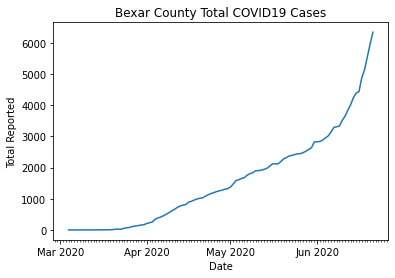

In [8]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c)
plt.title('Bexar County Total COVID19 Cases')
plt.savefig('BexarTotal.png')

In [9]:
c_5day_moving= c.rolling(5).mean().shift()

In [10]:
c_7day_moving= c.rolling(7).mean().shift()

In [11]:
c

,Total Cases
Date,
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,0.0
2020-03-09,0.0
2020-03-10,0.0
...,...
2020-06-17,4876.0
2020-06-18,5142.0
2020-06-19,5550.0


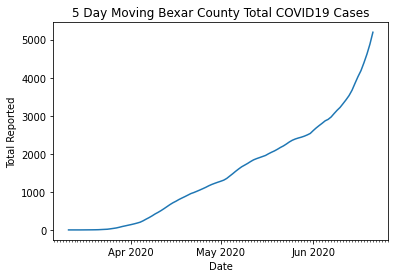

In [12]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c_5day_moving)
plt.title('5 Day Moving Bexar County Total COVID19 Cases')
plt.savefig('BexarTotalMoving.png')

In [13]:
x = c.diff(periods = 1)

In [14]:
print(x[-5:].to_markdown())

| Date                |   Total Cases |
|:--------------------|--------------:|
| 2020-06-17 00:00:00 |           439 |
| 2020-06-18 00:00:00 |           266 |
| 2020-06-19 00:00:00 |           408 |
| 2020-06-20 00:00:00 |           412 |
| 2020-06-21 00:00:00 |           382 |


In [15]:
x.rename(columns={'Total Cases':'New Cases'}, inplace=True)

In [16]:
print(x[-5:].to_markdown())

| Date                |   New Cases |
|:--------------------|------------:|
| 2020-06-17 00:00:00 |         439 |
| 2020-06-18 00:00:00 |         266 |
| 2020-06-19 00:00:00 |         408 |
| 2020-06-20 00:00:00 |         412 |
| 2020-06-21 00:00:00 |         382 |


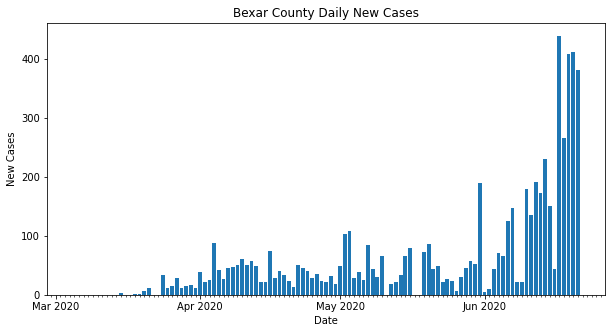

In [17]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('New Cases',color='black')
plt.title('Bexar County Daily New Cases')
plt.bar(x.index,x['New Cases'])
fig.savefig('BexarNewCasesDaily.png')

In [24]:
x_7day_moving= x.rolling(7).mean().shift()

Text(0.5, 1.0, '5 Day Moving Bexar County Total COVID19 Cases')

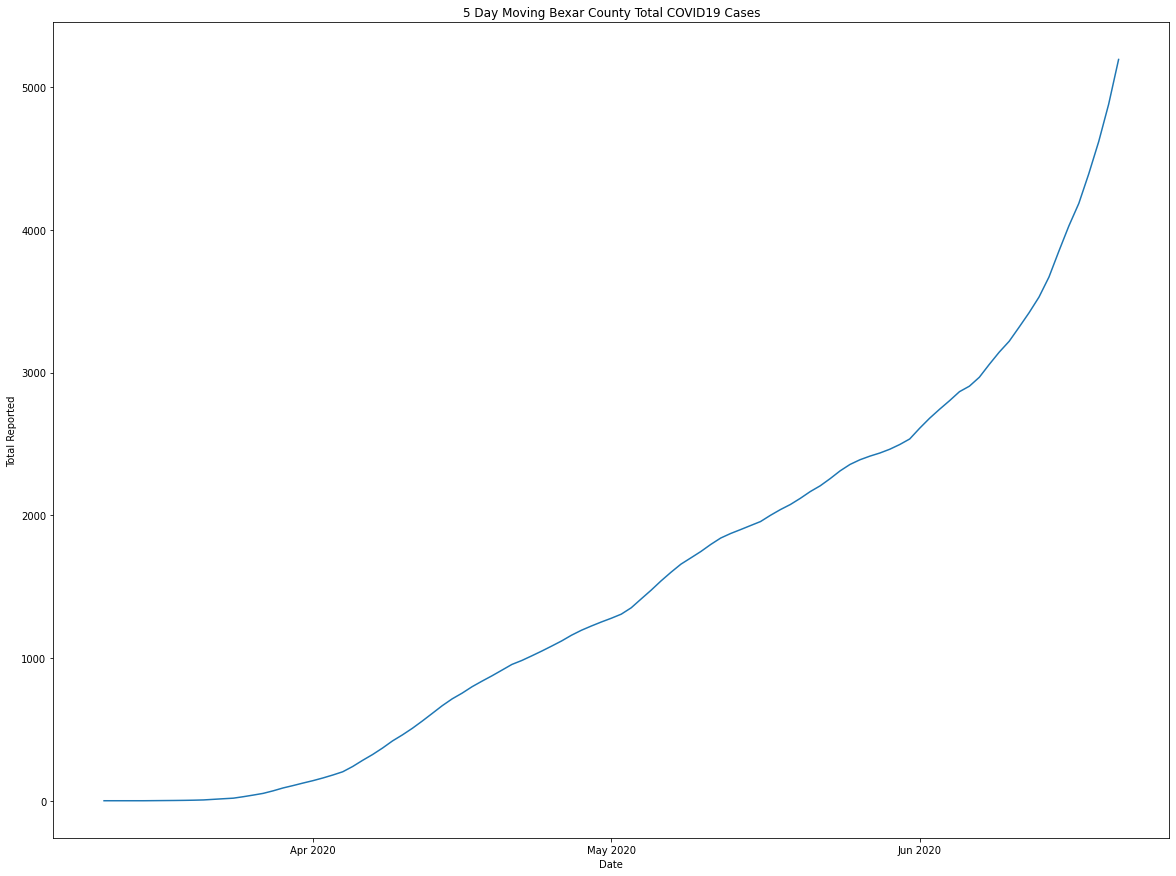

In [18]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(days)
#plt.subplot(211)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c_5day_moving)
plt.title('5 Day Moving Bexar County Total COVID19 Cases')

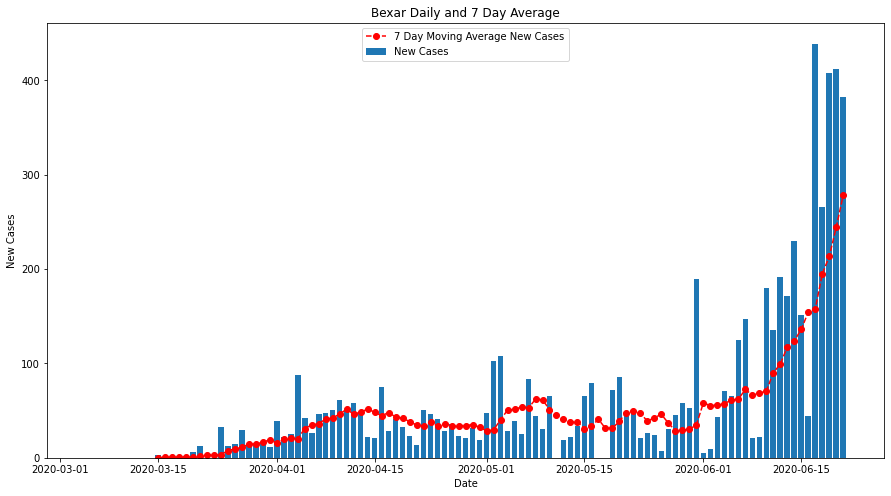

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax = plt.subplot(111)
ax.set_title('Bexar Daily and 7 Day Average')
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.bar(x.index,x['New Cases'])
plt.plot(x_7day_moving, 'ro--')
#ax.bar(x.index, x)
#ax.bar(e.index,e.DBCLabTests, width=0.2, color='g', align='center')
ax.xaxis_date()
#ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.set_ylabel('Daily Test Positivity Rate', color='red') 
#ax2.set_ylim(-5,100)
#ax2.plot(f['Percentage'],'ro--')
#ax2.tick_params(axis='y', labelcolor='red')

#fig.tight_layout() 

ax.legend(['7 Day Moving Average New Cases', 'New Cases'])
#ax2.legend(['Positivity Percentage'],loc=1)
#ax.autoscale(tight=True)
#ax.xaxis_date()
#plt.bar(f.index,f)
#plt.plot(f)
fig.savefig('BexarNewCasesand7DayAverage.png')